In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import os

repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))

Contents: ['other', 'sitafal', 'vad', 'pilikaren', 'sugarcane', 'sonmahor', 'shirish', 'saptaparni', 'simlo', 'pipal', 'nilgiri', 'gulmohor', 'jamun', 'kesudo', 'mango', 'motichanoti', 'neem', 'kanchan', 'gunda', 'khajur', 'bamboo', 'champa', 'bili', 'amla', 'banyan', 'babul', 'coconut', 'cactus', 'asopalav', 'garmalo', '.git']


In [ ]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [ ]:
import glob
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 177


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

           Image Count
vad                 50
sonmahor            50
sugarcane           50
sitafal             10
other                7
shape:  (31, 1)


Folder is empty, skipping: /content/drive/MyDrive/Tree_Species_Dataset/pilikaren


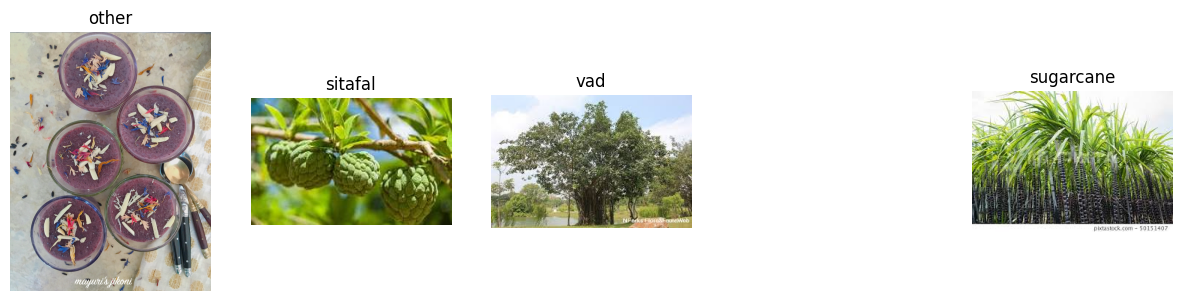

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os # Import os here

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    # Filter out non-image directories
    image_class_dirs = [d for d in class_dirs if os.path.isdir(os.path.join(repo_path, d)) and not d.startswith('.')]
    for i, class_dir in enumerate(image_class_dirs[:n]):
        class_folder = os.path.join(repo_path, class_dir)
        files_in_folder = os.listdir(class_folder)
        if files_in_folder: # Check if the folder is not empty
            img_filename = files_in_folder[0]
            img_path = os.path.join(class_folder, img_filename)
            if os.path.exists(img_path): # Check if the file exists
                try:
                    img = Image.open(img_path)
                    plt.subplot(1, n, i+1)
                    plt.imshow(img)
                    plt.title(class_dir)
                    plt.axis('off')
                except Exception as e:
                    print(f"Could not open image {img_path}: {e}")
            else:
                print(f"File not found: {img_path}")
        else:
            print(f"Folder is empty, skipping: {class_folder}") # Added message for empty folder
    plt.show()

# Define class_dirs here, similar to cell 6ZWiqOL2Ufko
class_dirs = os.listdir(repo_path)
show_sample_images(repo_path, class_dirs)

In [13]:
import os
import pandas as pd
from PIL import Image

image_shapes = []
# Define a list of valid image extensions
IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

for class_dir in class_dirs:
    class_folder = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_folder): # Ensure it's a directory before listing contents
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            if os.path.isfile(img_path): # Check if it's a file before trying to open
                # Check if the file has a common image extension
                if any(img_path.lower().endswith(ext) for ext in IMAGE_EXTENSIONS):
                    try:
                        img = Image.open(img_path)
                        image_shapes.append(img.size)
                    except Exception as e:
                        print(f"Could not open file {img_path}: {e}")
                # else:
                    # Optional: print a message for files with non-image extensions
                    # print(f"Skipping non-image file: {img_path}")


# DataFrame and Summary


shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print(shapes_df.head())
print("\nShape statistics:")
print(shapes_df.describe())

   Width  Height
0   3024    3905
1   3888    2592
2   3024    4032
3   1280    1280
4   2125    1416

Shape statistics:
             Width       Height
count   175.000000   175.000000
mean    436.097143   391.697143
std     682.209887   662.333219
min     173.000000   148.000000
25%     221.000000   183.000000
50%     259.000000   194.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [14]:
print(shapes_df.describe())

             Width       Height
count   175.000000   175.000000
mean    436.097143   391.697143
std     682.209887   662.333219
min     173.000000   148.000000
25%     221.000000   183.000000
50%     259.000000   194.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [16]:
import hashlib
from collections import defaultdict
import os # Import os here

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_folder = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_folder): # Ensure it's a directory
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(repo_path, class_dir, img_file)
            if os.path.isfile(img_path): # Check if it's a file before trying to open
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not read file {img_path}: {e}")


# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 2


In [17]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 2


Duplicate set 1:


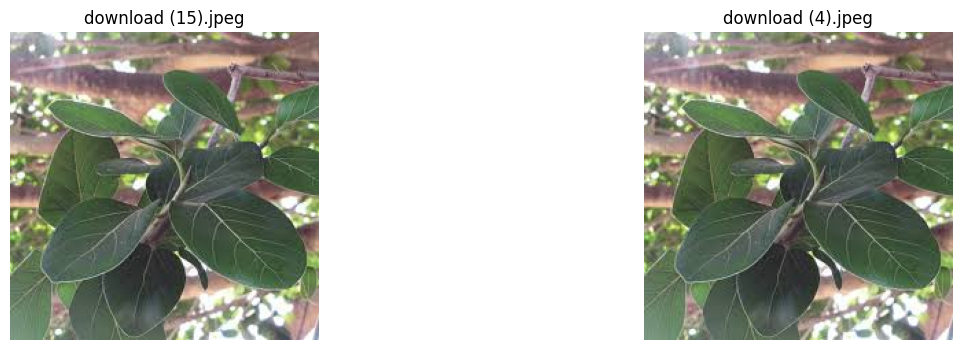

Duplicate set 2:


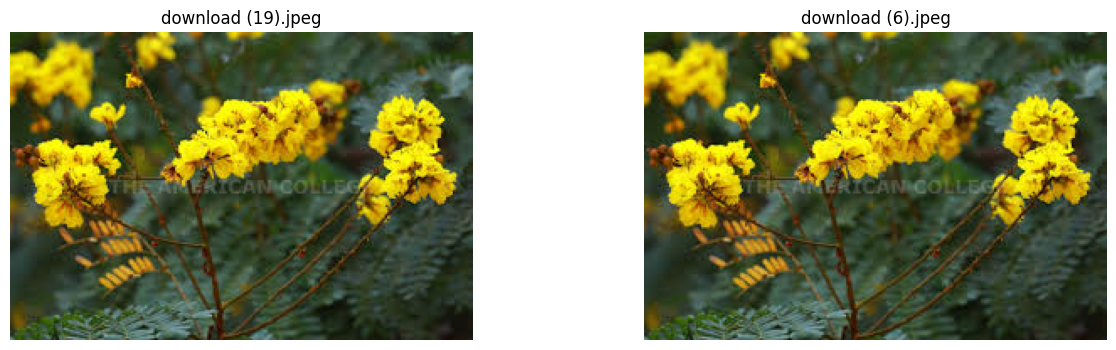

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [19]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 2 duplicate images.


In [21]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)
import os # Import os here

for class_dir in class_dirs:
    class_folder = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_folder): # Ensure it's a directory
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(repo_path, class_dir, img_file)
            if os.path.isfile(img_path): # Check if it's a file before trying to open
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not read file {img_path}: {e}")


duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [22]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 1
🔺 Very large images: 15


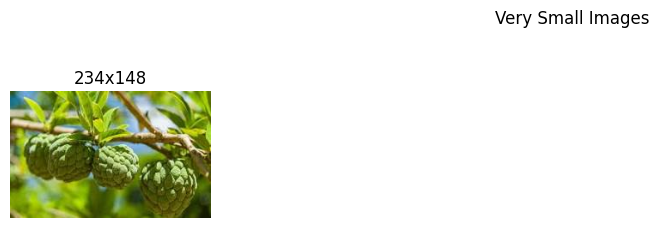

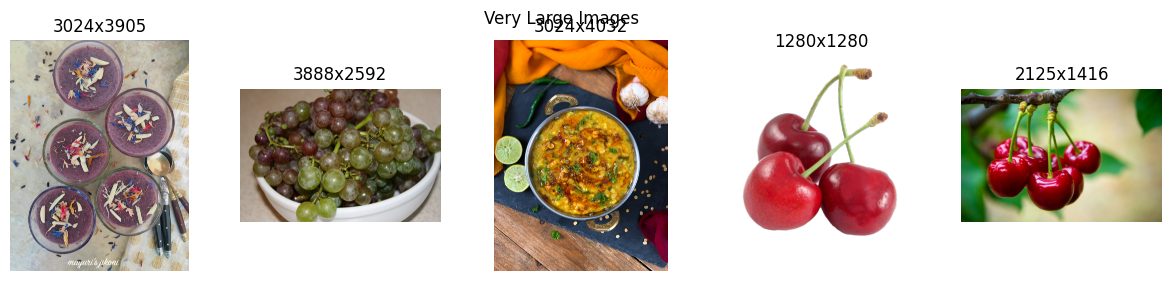

In [23]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [24]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 16 outlier images (small + large).


In [27]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                   'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

            width      height
count  157.000000  157.000000
mean   243.611465  211.006369
std     38.716863   36.659993
min    173.000000  151.000000
25%    202.000000  183.000000
50%    259.000000  194.000000
75%    275.000000  232.000000
max    335.000000  291.000000


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 128 images belonging to 31 classes.
Found 29 images belonging to 31 classes.


In [30]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [33]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.3750 - loss: 1.3382 - val_accuracy: 0.3103 - val_loss: 1.2305
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.3250 - loss: 1.3852 - val_accuracy: 0.3448 - val_loss: 1.2204
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3448 - loss: 1.4269 - val_accuracy: 0.3448 - val_loss: 1.2232
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.3396 - loss: 1.3473 - val_accuracy: 0.3103 - val_loss: 1.2342
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.2750 - loss: 1.3988 - val_accuracy: 0.3103 - val_loss: 1.2339
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.2281 - loss: 1.4651 - val_accuracy: 0.3103 - val_loss: 1.2360
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.2896 - loss: 1.3757 - val_accuracy: 0.3103 - val_loss: 1.2528
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.2927 - loss: 1.4611 - val_accuracy: 0.3103 - val_loss: 1.2284
Epoch 9/

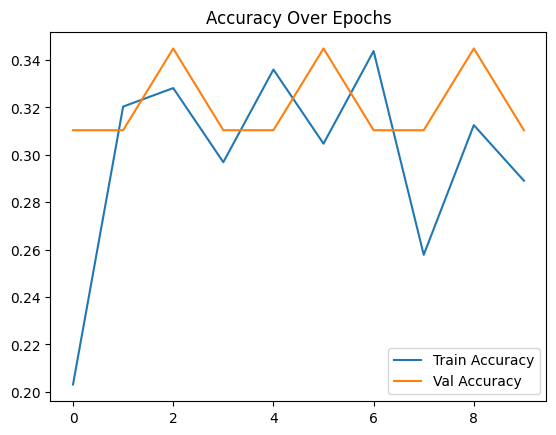

In [32]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 128 images belonging to 31 classes.
Found 29 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.1698 - loss: 3.5637 - val_accuracy: 0.3448 - val_loss: 2.0863
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.3740 - loss: 2.1138 - val_accuracy: 0.3448 - val_loss: 1.3155
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.3510 - loss: 1.7925 - val_accuracy: 0.4828 - val_loss: 1.2453
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.3656 - loss: 1.6020 - val_accuracy: 0.3793 - val_loss: 1.3372
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.2979 - loss: 1.5336 - val_accuracy: 0.5172 - val_loss: 1.2033
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.3729 - loss: 1.3496 - val_accuracy: 0.5517 - val_loss: 1.1293
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3156 - loss: 1.3242 - val_accuracy: 0.5862 - val_loss: 1.0647
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.4042 - loss: 1.3621 - val_accuracy: 0.6207 - val_loss: 0.9678
Epoch 9/

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


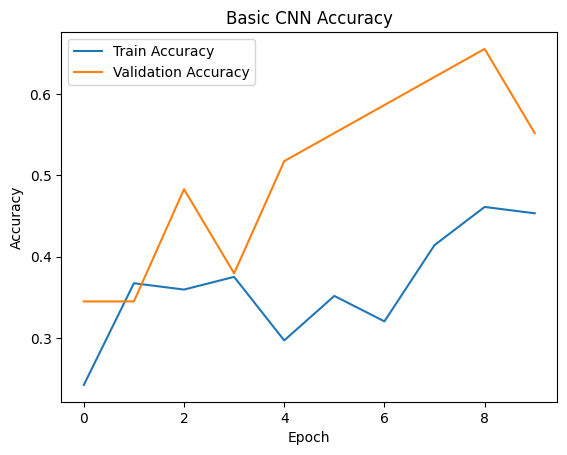

In [35]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Changed to use num_classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.1698 - loss: 5.5004 - val_accuracy: 0.3448 - val_loss: 2.9869
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.4708 - loss: 3.9058 - val_accuracy: 0.2414 - val_loss: 3.7356
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.5323 - loss: 2.9222 - val_accuracy: 0.0000e+00 - val_loss: 5.2760
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.6646 - loss: 2.1670 - val_accuracy: 0.0000e+00 - val_loss: 7.2165
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.6083 - loss: 2.0231 - val_accuracy: 0.0000e+00 - val_loss: 9.2173
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6375 - loss: 1.2359 - val_accuracy: 0.0000e+00 - val_loss: 11.2410
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.6792 - loss: 1.3390 - val_accuracy: 0.0000e+00 - val_loss: 13.1825
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.7417 - loss: 0.9446 - val_accuracy: 0.0000e+00 -